# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv
df=pd.read_csv("porter_data_1.csv")
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type


In [3]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [4]:
# Convert categorical features to category type
categorical_columns = ['market_id', 'store_primary_category', 'order_protocol']

for col in categorical_columns:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [5]:
# Calculate time taken in minutes
df['delivery_time_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_time_minutes  
0                      21.0     34.44                   47.0  
1                       2.0     27.60                   44.0  
2                      18.0     11.56                   55.0  
3                       8.0     31.80                   59.0  
4                       7.0      8.20                   46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [6]:
# Extract the hour and day of week from the 'created_at' timestamp


# Create a categorical feature 'isWeekend'
df['order_hour'] = df['created_at'].dt.hour
df['order_day_of_week'] = df['created_at'].dt.dayofweek  # Monday=0, Sunday=6

# Create a new categorical feature 'isWeekend'
df['isWeekend'] = df['order_day_of_week'].apply(lambda x: 1 if x >= 5 else 0).astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [7]:
# Drop unnecessary columns
columns_to_drop = ['created_at', 'actual_delivery_time', 'market_id']
df.drop(columns=columns_to_drop, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   store_primary_category    175777 non-null  category
 1   order_protocol            175777 non-null  category
 2   total_items               175777 non-null  int64   
 3   subtotal                  175777 non-null  int64   
 4   num_distinct_items        175777 non-null  int64   
 5   min_item_price            175777 non-null  int64   
 6   max_item_price            175777 non-null  int64   
 7   total_onshift_dashers     175777 non-null  float64 
 8   total_busy_dashers        175777 non-null  float64 
 9   total_outstanding_orders  175777 non-null  float64 
 10  distance                  175777 non-null  float64 
 11  delivery_time_minutes     175777 non-null  float64 
 12  order_hour                175777 non-null  int32   
 13  order_day_of_week         175

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [8]:
# Define target variable (y) and features (X)
y = df['delivery_time_minutes']
X = df.drop(columns=['delivery_time_minutes'])

# Check shapes
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (175777, 14)
y shape: (175777,)


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [9]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check the sizes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (140621, 14)
Testing set size: (35156, 14)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [10]:
# Define numerical and categorical columns for easy EDA and data manipulation
categorical_cols = X.select_dtypes(include=['category', 'object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


Categorical columns: ['store_primary_category', 'order_protocol', 'isWeekend']
Numerical columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

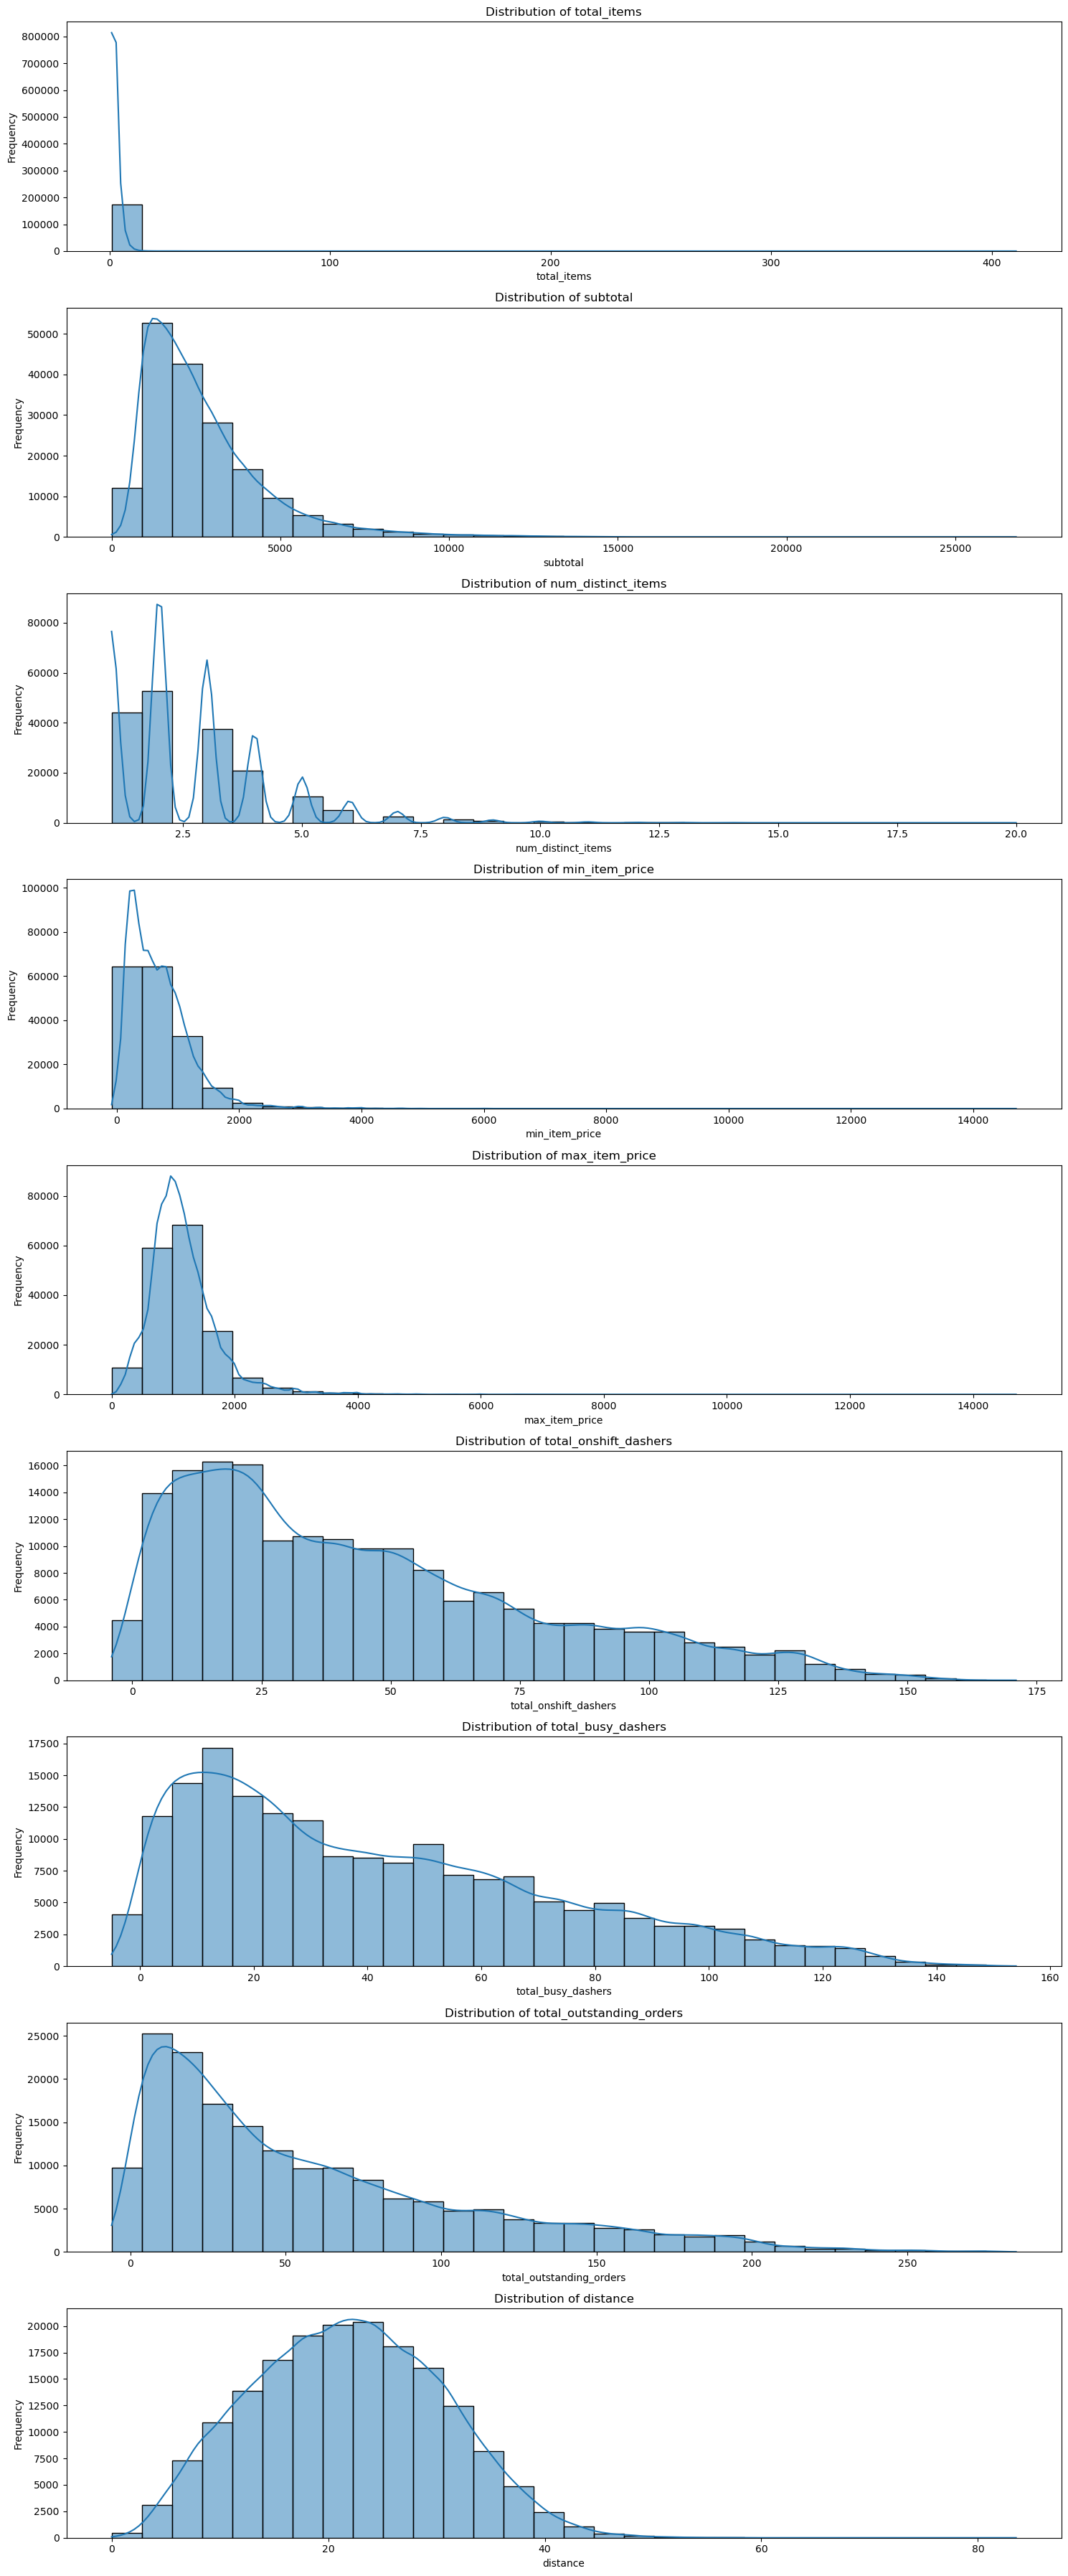

In [11]:
# Plot distributions for all numerical columns

plt.figure(figsize=(15, len(numerical_cols) * 4))

# Plot each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)
    sns.histplot(X[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

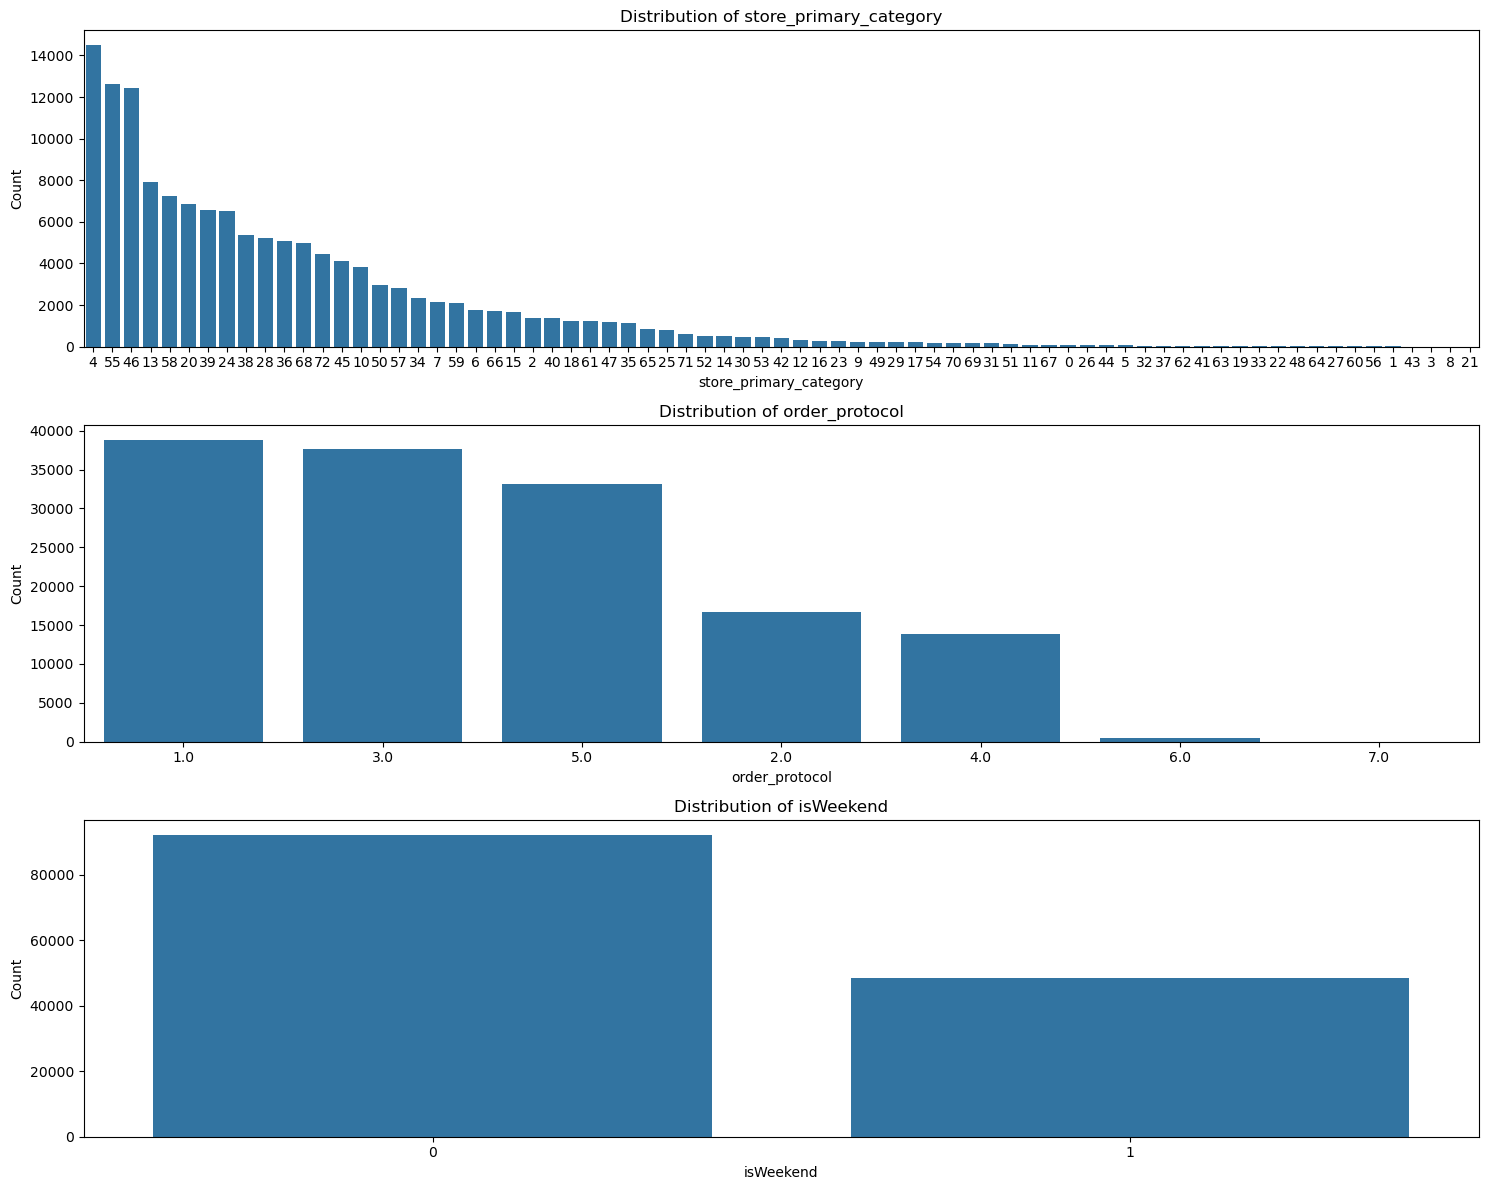

In [12]:
# Distribution of categorical columns

plt.figure(figsize=(15, len(categorical_cols) * 4))

for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1)
    sns.countplot(data=X_train, x=col, order=X_train[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

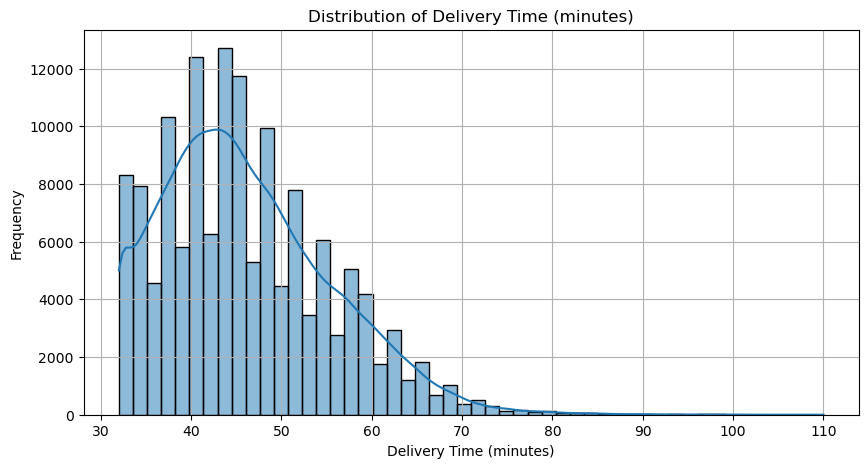

In [13]:
# Distribution of time_taken

plt.figure(figsize=(10, 5))
sns.histplot(y_train, bins=50, kde=True)
plt.title('Distribution of Delivery Time (minutes)')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

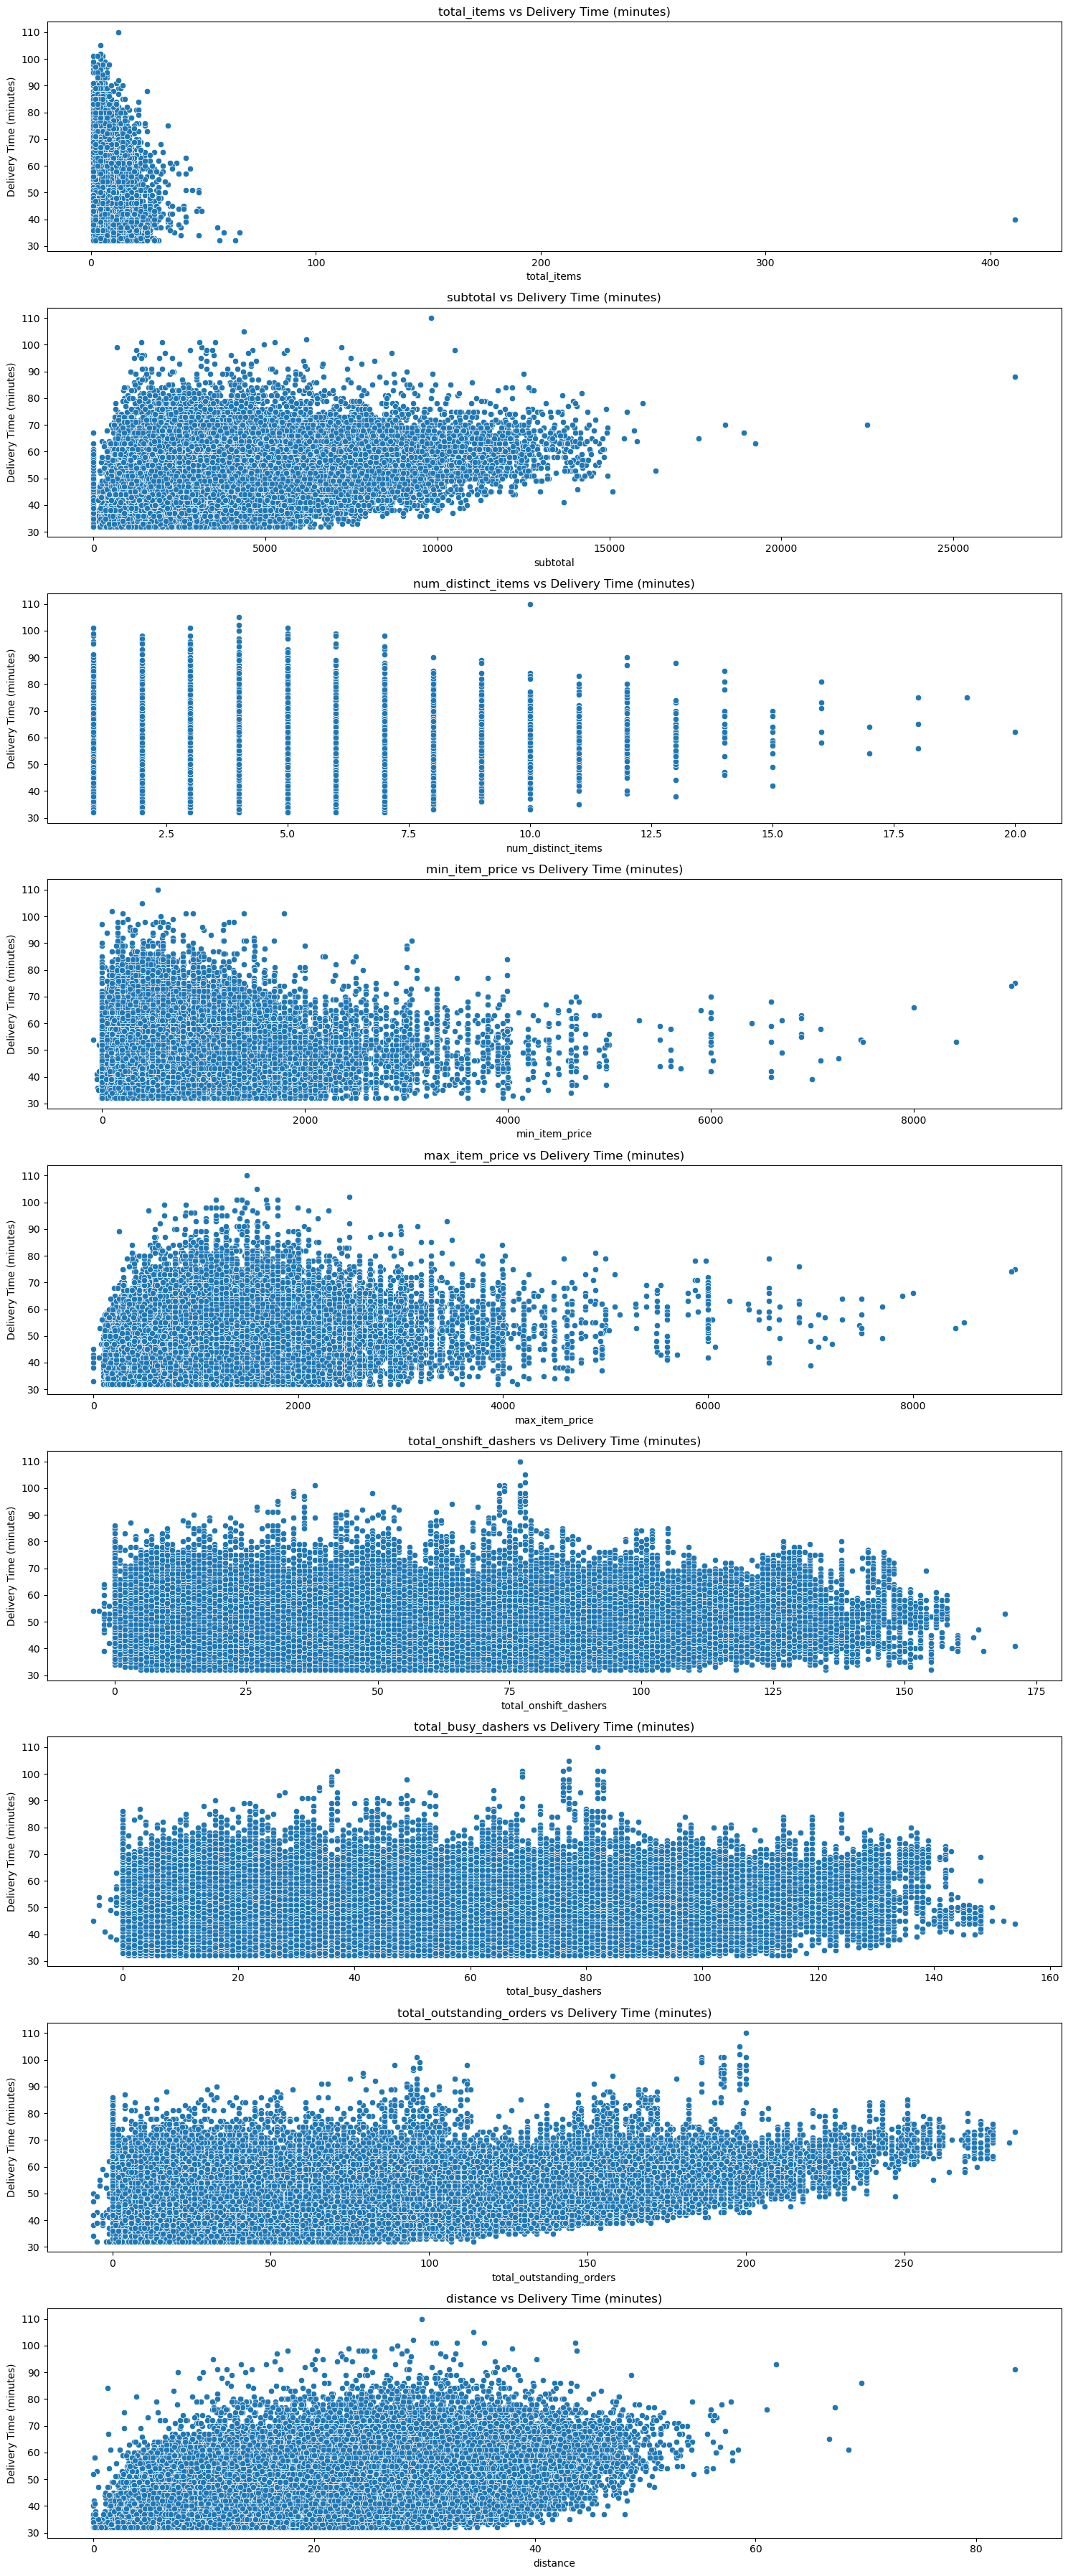

In [14]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(15, len(numerical_cols) * 4))

# Create one scatter plot per feature
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)
    sns.scatterplot(x=X_train[col], y=y_train)
    plt.title(f'{col} vs Delivery Time (minutes)')
    plt.xlabel(col)
    plt.ylabel('Delivery Time (minutes)')

plt.tight_layout()
plt.show()


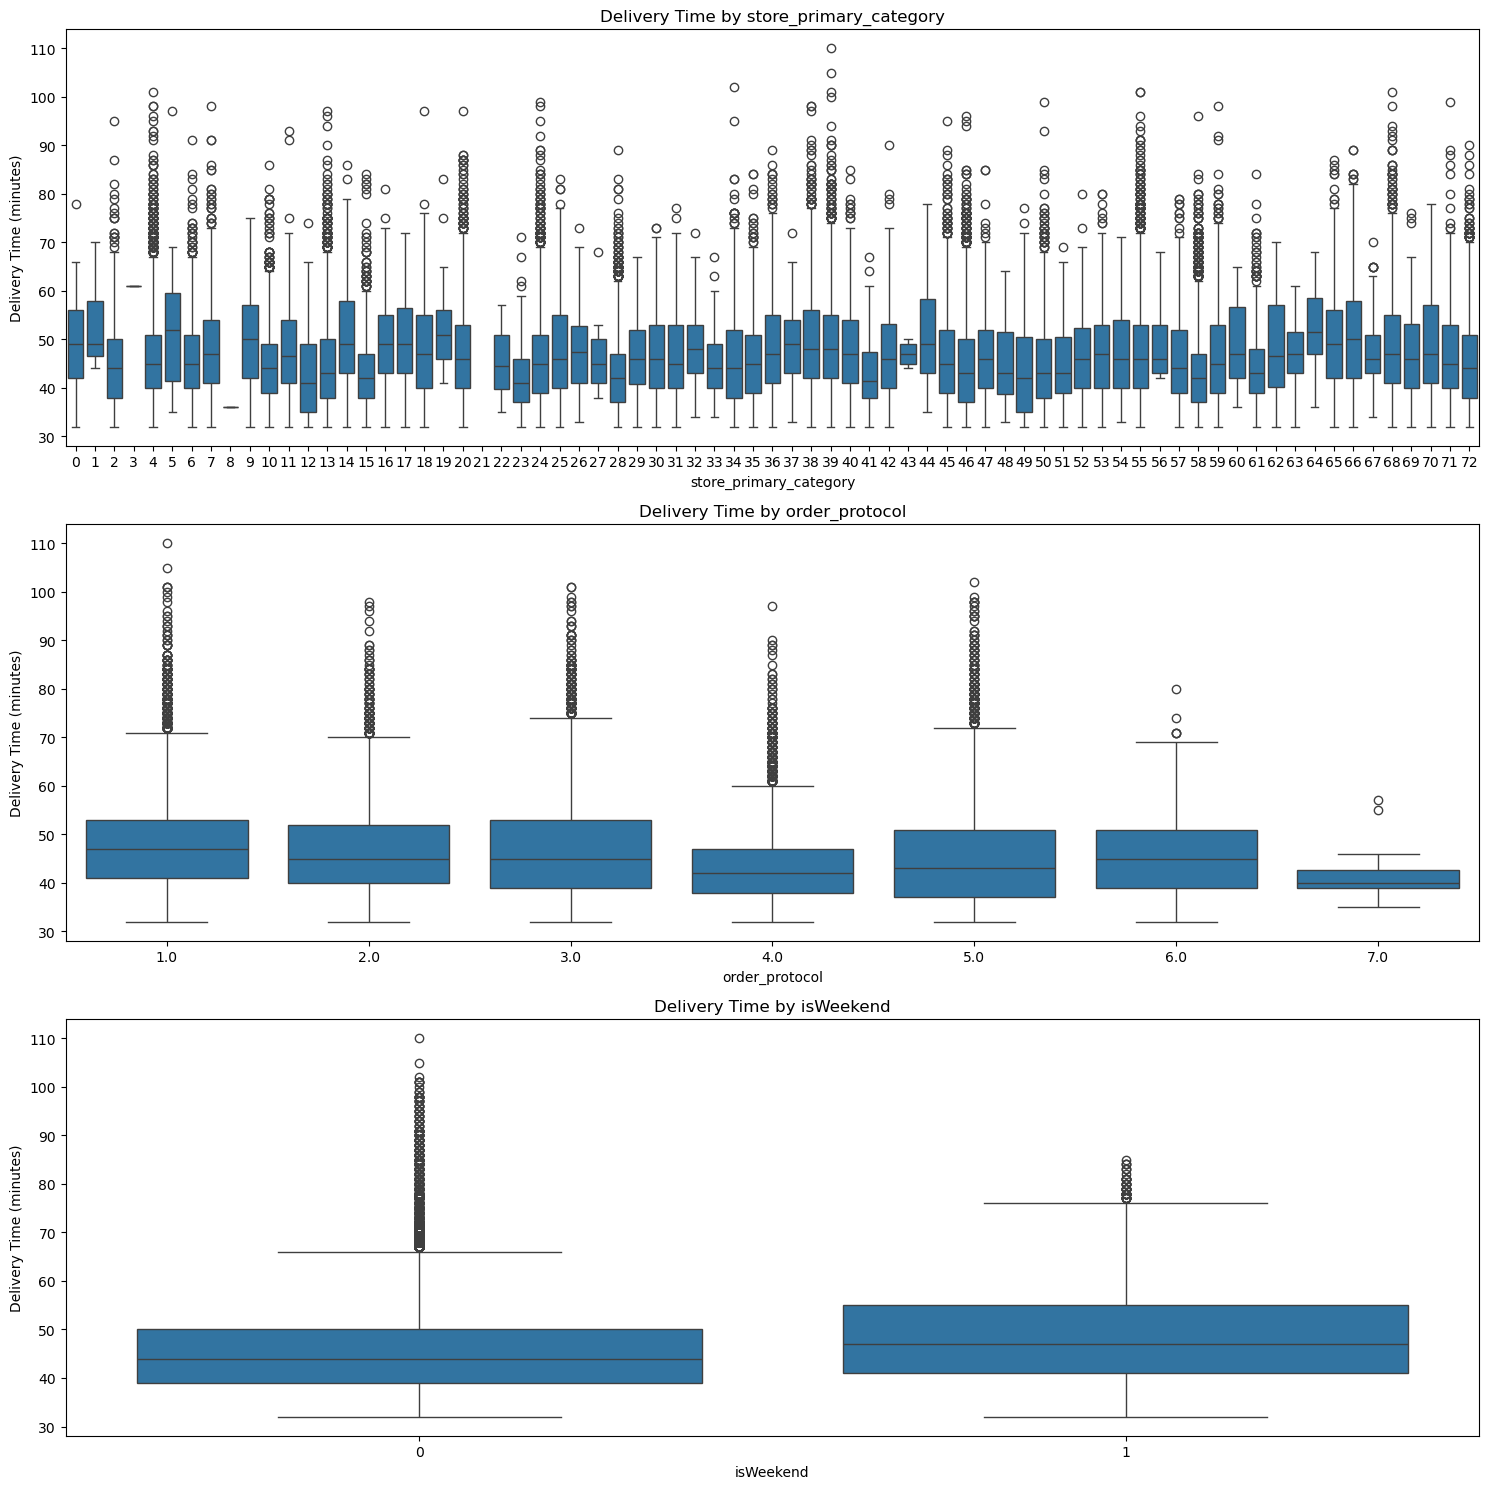

In [15]:
plt.figure(figsize=(15, len(categorical_cols) * 5))

# Create one boxplot per categorical feature
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1)
    sns.boxplot(data=X_train.join(y_train), x=col, y='delivery_time_minutes')
    plt.title(f'Delivery Time by {col}')
    plt.xlabel(col)
    plt.ylabel('Delivery Time (minutes)')

plt.tight_layout()
plt.show()


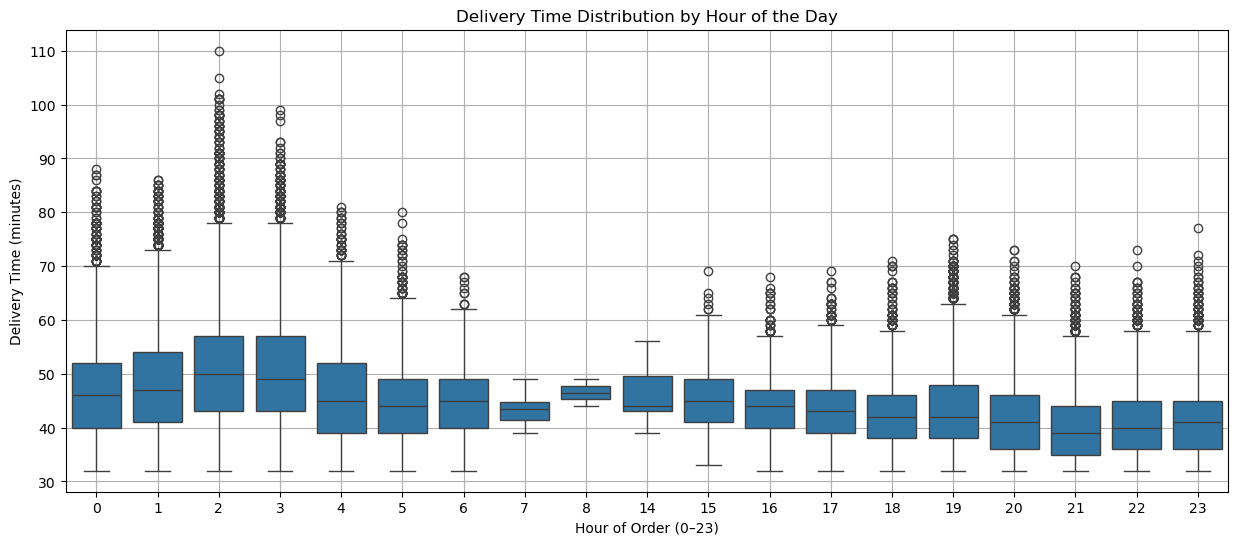

In [16]:
# Show the distribution of time_taken for different hours

# Combine training data with target variable
hourly_df = X_train.copy()
hourly_df['delivery_time_minutes'] = y_train

plt.figure(figsize=(15, 6))
sns.boxplot(data=hourly_df, x='order_hour', y='delivery_time_minutes')
plt.title('Delivery Time Distribution by Hour of the Day')
plt.xlabel('Hour of Order (0–23)')
plt.ylabel('Delivery Time (minutes)')
plt.grid(True)
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

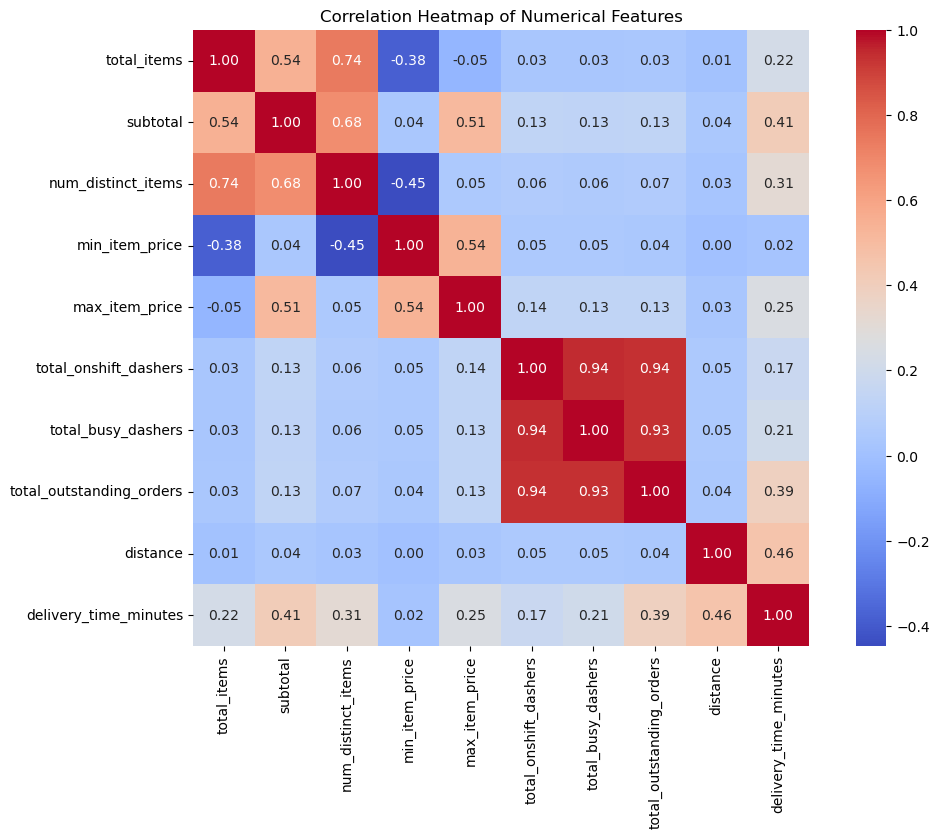

In [17]:
# Plot the heatmap of the correlation matrix

corr_df = X_train[numerical_cols].copy()
corr_df['delivery_time_minutes'] = y_train

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()



##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [18]:
# Drop 3-5 weakly correlated columns from training dataset

target_corr = corr_df.corr()['delivery_time_minutes'].drop('delivery_time_minutes')

# Sort by absolute correlation
weak_corr = target_corr.abs().sort_values()

columns_to_drop = weak_corr.head(5).index.tolist()
strong_corr_cols = weak_corr.iloc[5:].index.tolist()


# Drop from both train and test sets
X_train.drop(columns=columns_to_drop, inplace=True)
X_test.drop(columns=columns_to_drop, inplace=True)

print("Dropped columns:", columns_to_drop)
print("Strongly correlated columns:", strong_corr_cols)
X_train.info()

Dropped columns: ['min_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_items', 'max_item_price']
Strongly correlated columns: ['num_distinct_items', 'total_outstanding_orders', 'subtotal', 'distance']
<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 102712 to 121958
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   store_primary_category    140621 non-null  category
 1   order_protocol            140621 non-null  category
 2   subtotal                  140621 non-null  int64   
 3   num_distinct_items        140621 non-null  int64   
 4   total_outstanding_orders  140621 non-null  float64 
 5   distance                  140621 non-null  float64 
 6   order_hour                140621 non-null  int32   
 7   order_day_of_week         140621 non-null  int32   
 8   isWeekend                 140621 non-null  category
dtypes: category(3), float64(2), int32(2), 

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

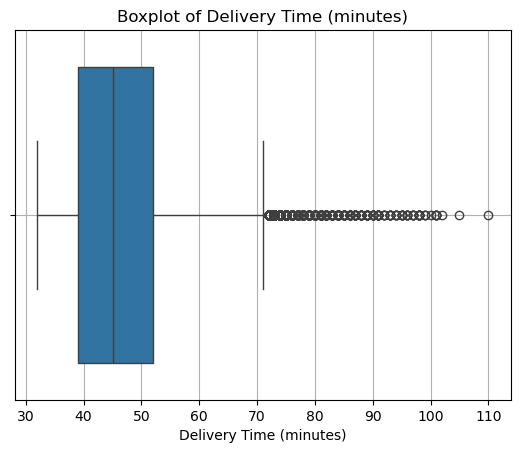

In [19]:
# Boxplot for time_taken

sns.boxplot(x=y_train)
plt.title('Boxplot of Delivery Time (minutes)')
plt.xlabel('Delivery Time (minutes)')
plt.grid(True)
plt.show()

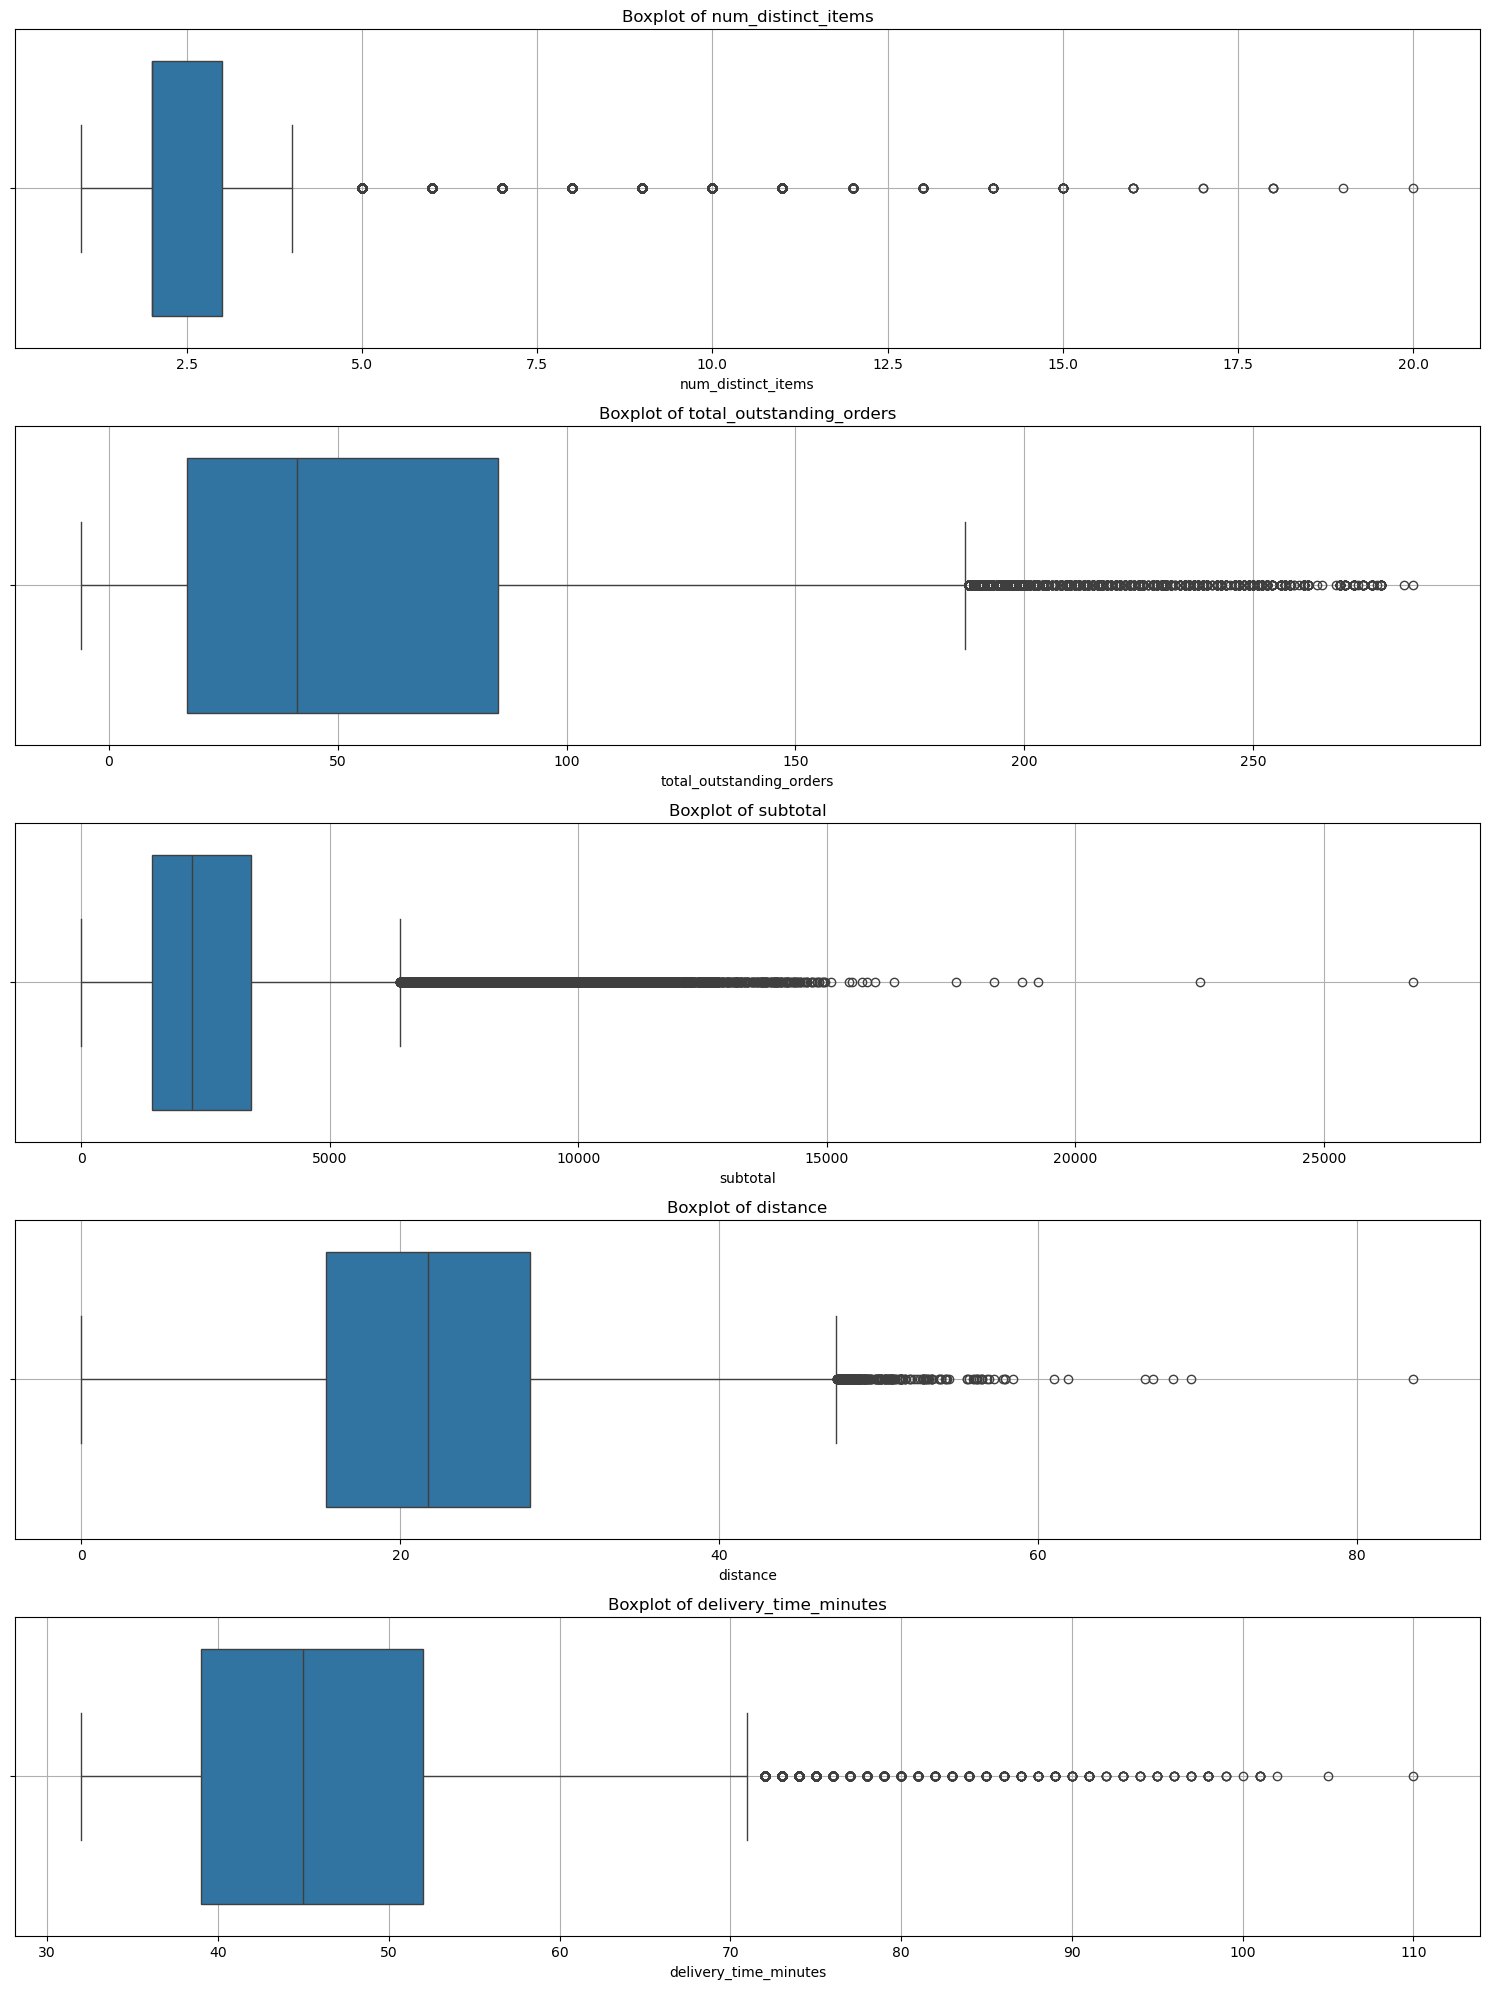

In [20]:
# Boxplot for other numeric predictors

boxplot_df = X_train[strong_corr_cols].copy()
boxplot_df['delivery_time_minutes'] = y_train

# Set up plot grid
plt.figure(figsize=(15, len(boxplot_df.columns) * 4))

# Plot each numerical column as a boxplot
for i, col in enumerate(boxplot_df.columns):
    plt.subplot(len(boxplot_df.columns), 1, i + 1)
    sns.boxplot(x=boxplot_df[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [21]:
# Handle outliers
# Cap using quantiles 
def cap_outliers_quantile(df, columns, lower_q=0.25, upper_q=0.95):
    df_capped = df.copy()
    for col in columns:
        lower = df_capped[col].quantile(lower_q)
        upper = df_capped[col].quantile(upper_q)
        df_capped[col] = df_capped[col].clip(lower, upper)
    return df_capped

# Apply to train data
X_train = cap_outliers_quantile(X_train, strong_corr_cols)
y_train = cap_outliers_quantile(y_train.to_frame(), ['delivery_time_minutes'])['delivery_time_minutes']



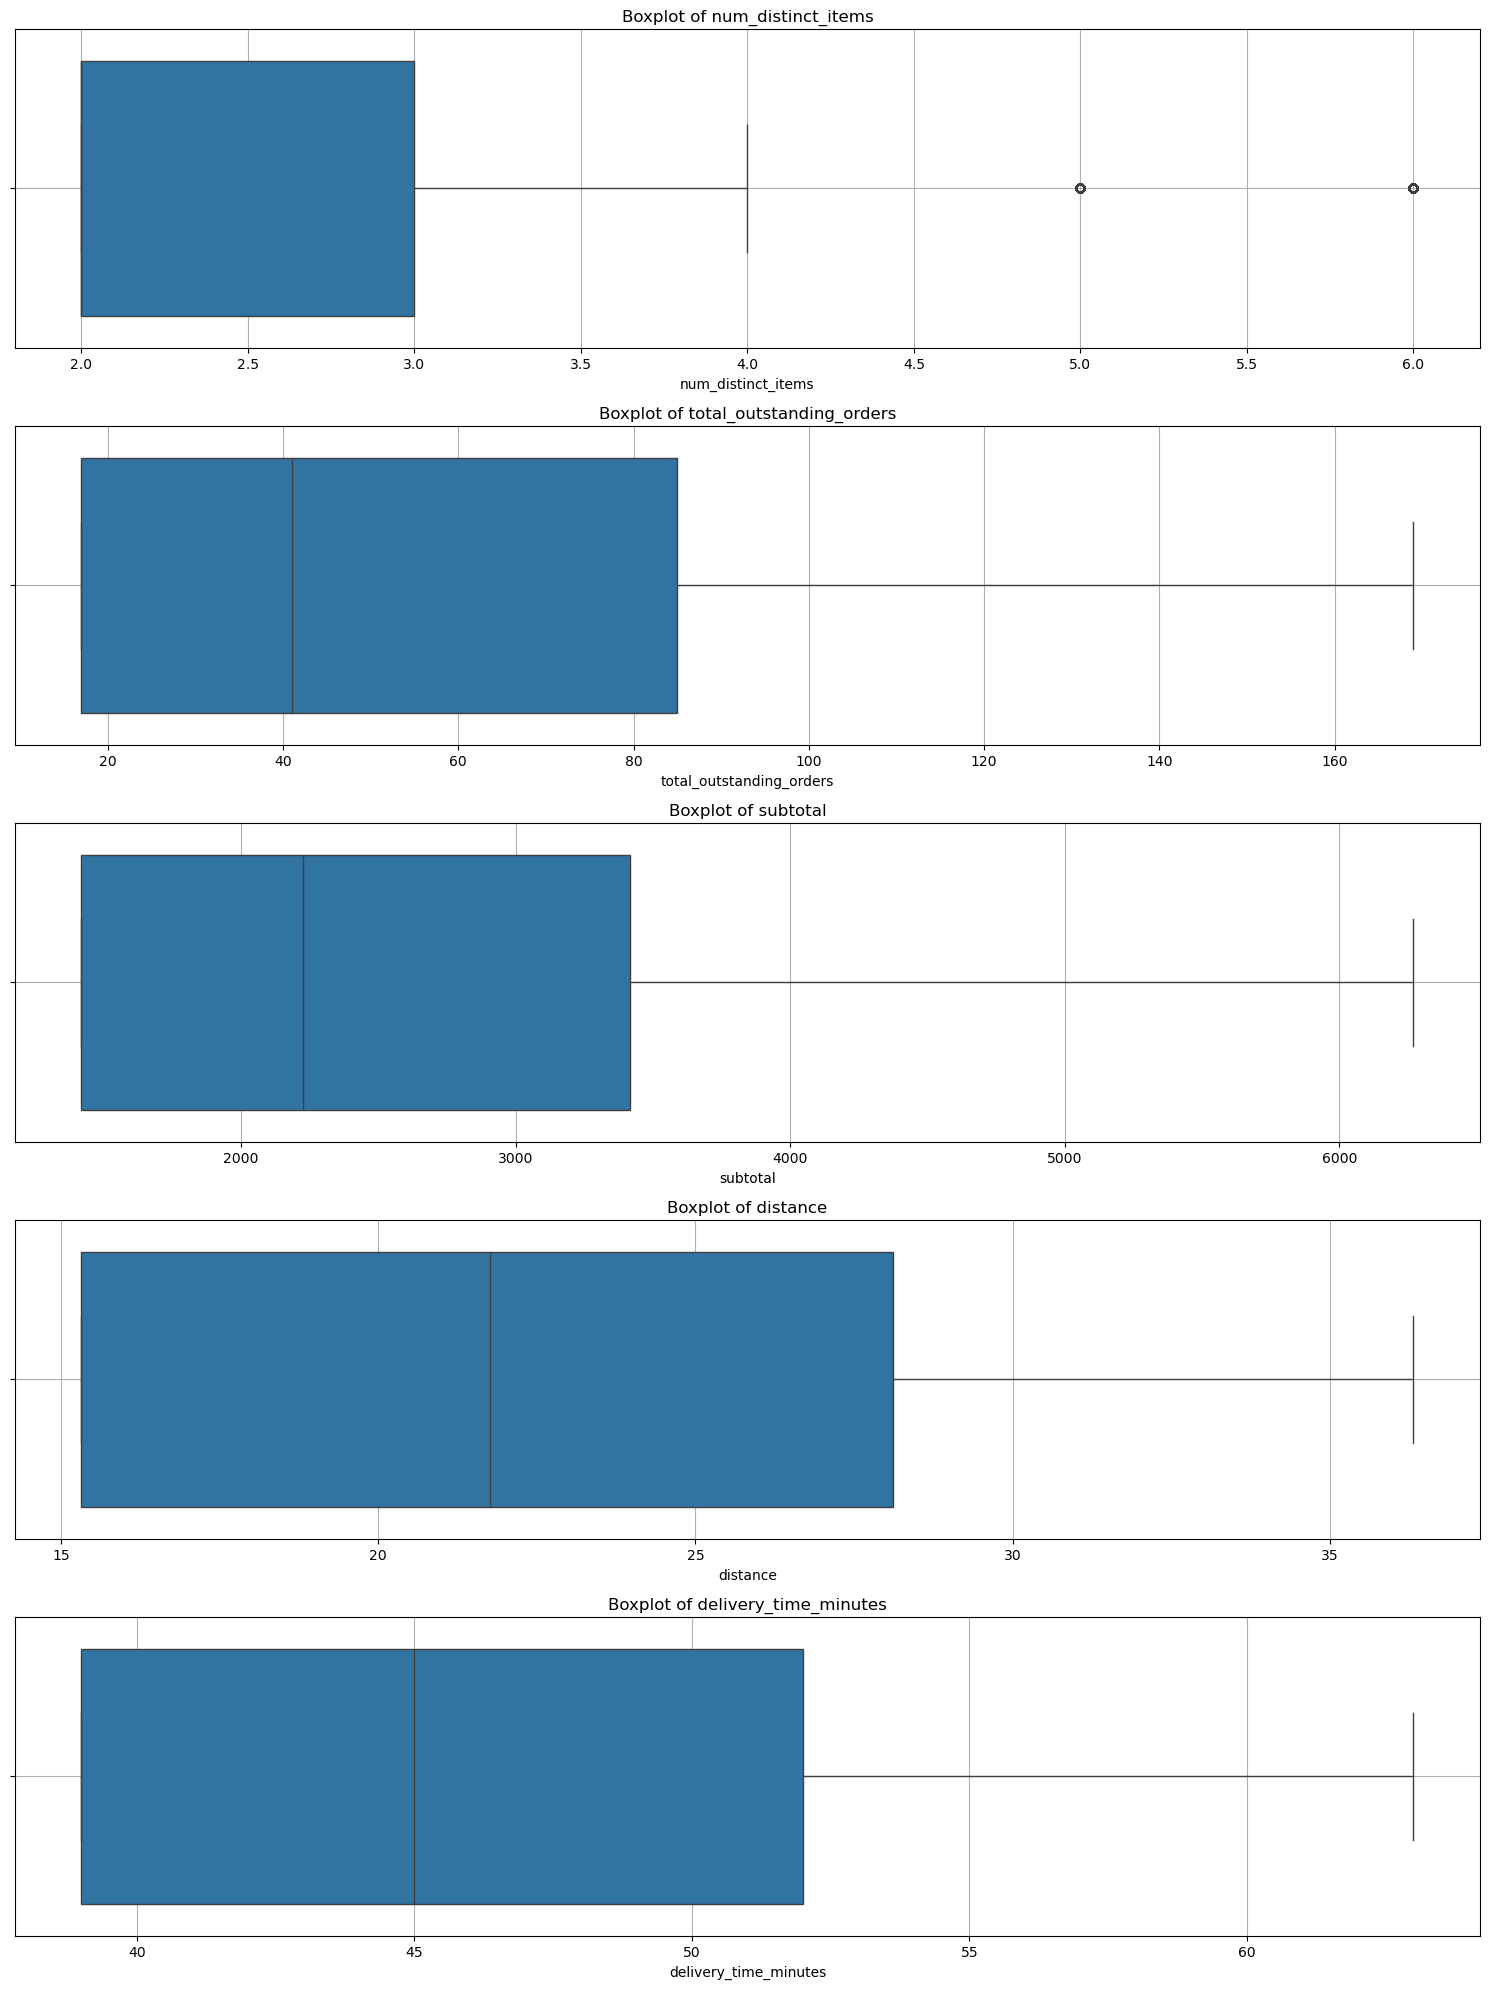

In [22]:
boxplot_df = X_train[strong_corr_cols].copy()
boxplot_df['delivery_time_minutes'] = y_train

# Set up plot grid
plt.figure(figsize=(15, len(boxplot_df.columns) * 4))

# Plot each numerical column as a boxplot
for i, col in enumerate(boxplot_df.columns):
    plt.subplot(len(boxplot_df.columns), 1, i + 1)
    sns.boxplot(x=boxplot_df[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [23]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [24]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [25]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [26]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [27]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [28]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [29]:
# Import libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
X_train.head()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 102712 to 121958
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   store_primary_category    140621 non-null  category
 1   order_protocol            140621 non-null  category
 2   subtotal                  140621 non-null  int64   
 3   num_distinct_items        140621 non-null  int64   
 4   total_outstanding_orders  140621 non-null  float64 
 5   distance                  140621 non-null  float64 
 6   order_hour                140621 non-null  int32   
 7   order_day_of_week         140621 non-null  int32   
 8   isWeekend                 140621 non-null  category
dtypes: category(3), float64(2), int32(2), int64(2)
memory usage: 10.9 MB


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [32]:
# Apply scaling to the numerical columns

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize scaler
minmax_scaler = MinMaxScaler()

# Create copies of datasets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Fit on training data and transform
X_train_scaled[numerical_cols] = minmax_scaler.fit_transform(X_train[numerical_cols])

# Apply same scaling to test data
X_test_scaled[numerical_cols] = minmax_scaler.transform(X_test[numerical_cols])


# Drop the 'store_primary_category' categorical column as it has very large number of categories 
X_train_scaled = X_train_scaled.drop(columns=['store_primary_category'])
X_test_scaled = X_test_scaled.drop(columns=['store_primary_category'])


X_train_encoded = pd.get_dummies(X_train_scaled, columns=['order_protocol'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test_scaled, columns=['order_protocol'], drop_first=True)

X_train_encoded['isWeekend'] = X_train_encoded['isWeekend'].astype(int)
X_test_encoded['isWeekend'] = X_test_encoded['isWeekend'].astype(int)

bool_cols = [col for col in X_train_encoded.columns if X_train_encoded[col].dtype == 'bool']
X_train_encoded[bool_cols] = X_train_encoded[bool_cols].astype(int)
X_test_encoded[bool_cols] = X_test_encoded[bool_cols].astype(int)

scaler = MinMaxScaler()
time_cols = ['order_hour', 'order_day_of_week']

X_train_encoded[time_cols] = scaler.fit_transform(X_train_encoded[time_cols])
X_test_encoded[time_cols] = scaler.transform(X_test_encoded[time_cols])


X_train_encoded.head()


subtotal  num_distinct_items  total_outstanding_orders  distance  \
102712  0.000000                 0.0                  0.256579  0.714286   
94576   0.000000                 0.0                  0.651316  0.754286   
49784   0.128195                 0.5                  0.000000  0.135238   
37753   0.197444                 0.0                  0.013158  0.862857   
91728   0.002473                 0.0                  0.230263  0.773333   

        order_hour  order_day_of_week  isWeekend  order_protocol_2.0  \
102712    0.913043           0.166667          0                   1   
94576     0.086957           0.666667          0                   0   
49784     0.913043           0.666667          0                   0   
37753     0.130435           0.166667          0                   0   
91728     0.913043           0.666667          0                   0   

        order_protocol_3.0  order_protocol_4.0  order_protocol_5.0  \
102712                   0                   0                   0   
94576                    1                   0                   0   
49784                    1                   0                   0   
37753                    0                   0                   0   
91728                    0                   0                   0   

        order_protocol_6.0  order_protocol_7.0  
102712                   0                   0  
94576                    0                   0  
49784                    0                   0  
37753                    0                   0  
91728                    0                   0

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [34]:
# Create/Initialise the model
import statsmodels.api as sm

# Add a constant term (intercept) to features
X_train_sm = sm.add_constant(X_train_encoded)

# Initialize the model
model_sm = sm.OLS(y_train, X_train_sm)


In [35]:
# Train the model using the training data
model_sm = sm.OLS(y_train, X_train_sm)
results = model_sm.fit()

# Print model summary
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     delivery_time_minutes   R-squared:                       0.519
Model:                               OLS   Adj. R-squared:                  0.519
Method:                    Least Squares   F-statistic:                 1.167e+04
Date:                   Wed, 30 Jul 2025   Prob (F-statistic):               0.00
Time:                           19:37:49   Log-Likelihood:            -4.3338e+05
No. Observations:                 140621   AIC:                         8.668e+05
Df Residuals:                     140607   BIC:                         8.669e+05
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [37]:
# Make predictions
X_test_sm = sm.add_constant(X_test_encoded)
y_pred = results.predict(X_test_sm)

In [40]:
# Find results for evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Model Evaluation Metrics")
print(f"R² Score : {r2:.4f}")
print(f"RMSE     : {rmse:.4f}")
print(f"MAE      : {mae:.4f}")

Model Evaluation Metrics
R² Score : 0.5380
RMSE     : 6.3589
MAE      : 4.8888


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

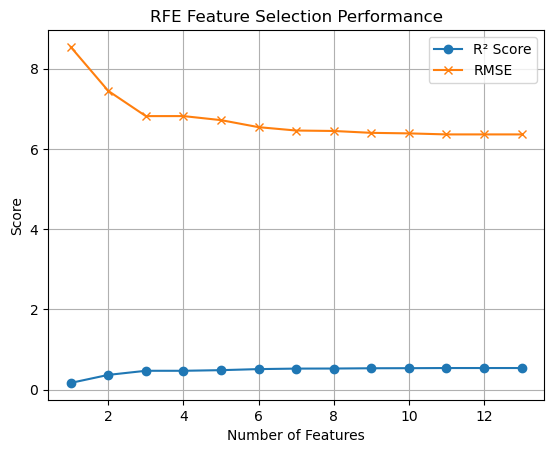

Selected Features: ['subtotal', 'num_distinct_items', 'total_outstanding_orders', 'distance', 'order_hour', 'order_day_of_week', 'isWeekend', 'order_protocol_5.0']


In [44]:
# Loop through the number of features and test the model

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Store results
rfe_results = []

# Loop through different numbers of features (1 to total)
for n in range(1, X_train_encoded.shape[1] + 1):
    # Initialize model
    model = LinearRegression()
    
    # Initialize RFE
    selector = RFE(model, n_features_to_select=n)
    selector = selector.fit(X_train_encoded, y_train)
    
    # Transform datasets
    X_train_rfe = selector.transform(X_train_encoded)
    X_test_rfe = selector.transform(X_test_encoded)
    
    # Fit model
    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_test_rfe)
    
    # Evaluate performance
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store results
    rfe_results.append((n, r2, rmse))

# Convert to DataFrame for analysis
rfe_df = pd.DataFrame(rfe_results, columns=['Num_Features', 'R2_Score', 'RMSE'])

plt.plot(rfe_df['Num_Features'], rfe_df['R2_Score'], marker='o', label='R² Score')
plt.plot(rfe_df['Num_Features'], rfe_df['RMSE'], marker='x', label='RMSE')
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.title('RFE Feature Selection Performance')
plt.legend()
plt.grid(True)
plt.show()

final_rfe = RFE(estimator=LinearRegression(), n_features_to_select=8)
final_rfe.fit(X_train_encoded, y_train)

# Get selected features
selected_features = X_train_encoded.columns[final_rfe.support_]
print("Selected Features:", list(selected_features))

In [45]:
# Build the final model with selected number of features

# Final feature list
selected_features = ['subtotal', 'num_distinct_items', 'total_outstanding_orders', 'distance',
                     'order_hour', 'order_day_of_week', 'isWeekend', 'order_protocol_5.0']

# Filter data
X_train_final = X_train_encoded[selected_features]
X_test_final = X_test_encoded[selected_features]

# Initialize model
final_model = LinearRegression()

# Train the model
final_model.fit(X_train_final, y_train)

# Make predictions
y_pred_final = final_model.predict(X_test_final)

# Evaluate
r2 = r2_score(y_test, y_pred_final)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
mae = mean_absolute_error(y_test, y_pred_final)

print("Final Model Evaluation (RFE Features)")
print(f"R² Score : {r2:.4f}")
print(f"RMSE     : {rmse:.4f}")
print(f"MAE      : {mae:.4f}")

Final Model Evaluation (RFE Features)
R² Score : 0.5255
RMSE     : 6.4445
MAE      : 4.9676


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

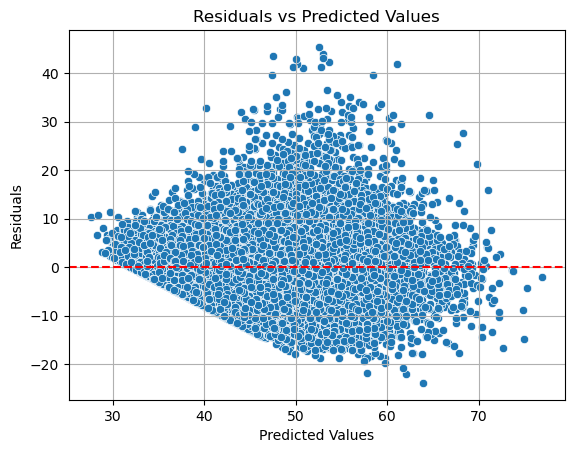

In [46]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred_final

sns.scatterplot(x=y_pred_final, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


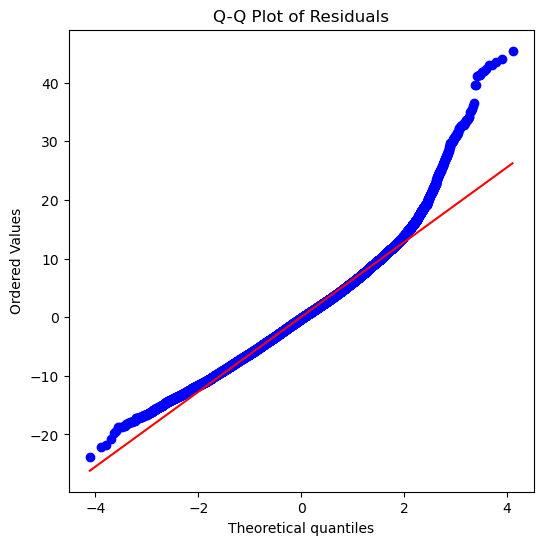

In [47]:
# Perform residual analysis using Q-Q plot 
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

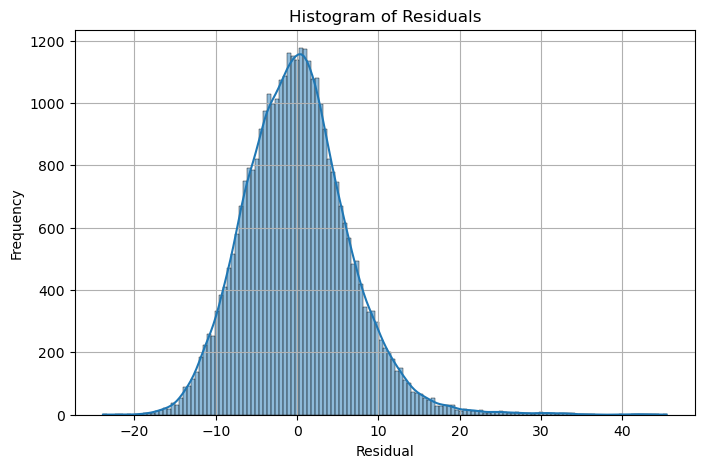

In [48]:
# Perform residual analysis using histogram
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

[Your inferences here:]

Linear regression explains ~52–53% of variance in delivery time.
Residuals are spread around zero but not perfectly random. possible - heteroscedasticity

There is a funnel-like shape, where variance increases with higher predicted values.Predictions for larger delivery times are less accurate 

Presence of outliers or skewed errors.



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [49]:
# Compare the scaled vs unscaled features used in the final model
#the final model used had only scaled features , no unscaled features were used 

coef_data = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient (Scaled)': final_model.coef_
}).sort_values(by='Coefficient (Scaled)', ascending=False)

print(coef_data)

                    Feature  Coefficient (Scaled)
3                  distance              9.582012
0                  subtotal              7.103053
2  total_outstanding_orders              6.631977
6                 isWeekend              3.721317
1        num_distinct_items              1.603152
7        order_protocol_5.0             -1.858769
4                order_hour             -3.492962
5         order_day_of_week             -3.618912


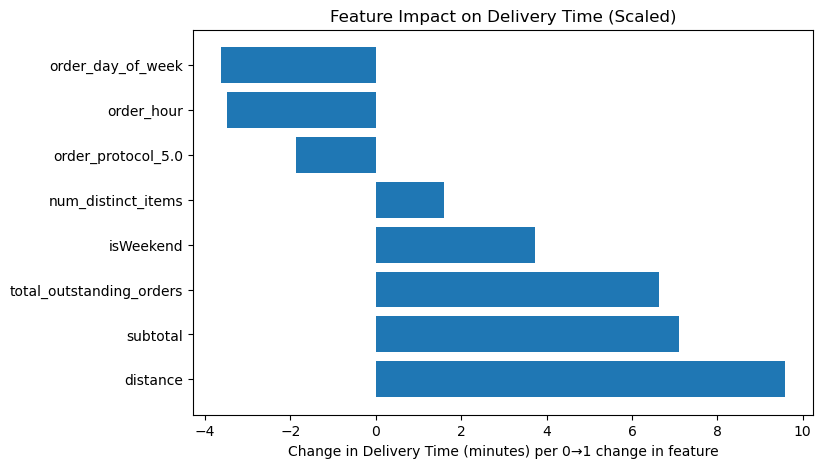

In [51]:
plt.figure(figsize=(8,5))
plt.barh(coef_data['Feature'], coef_data['Coefficient (Scaled)'])
plt.title("Feature Impact on Delivery Time (Scaled)")
plt.xlabel("Change in Delivery Time (minutes) per 0→1 change in feature")
plt.show()

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [53]:
# Analyze the effect of a unit change in a feature, say 'total_items'

X_train_numeric = X_train.copy()

# Convert categorical features to numeric (if any)
for col in X_train_numeric.select_dtypes(include='category').columns:
    X_train_numeric[col] = X_train_numeric[col].astype(int)

# Dictionary to store effects
effects = {}

for feature in selected_features:
    coef = final_model.coef_[selected_features.index(feature)]
    
    # Calculate the range safely
    if feature in X_train_numeric.columns:
        feature_range = X_train_numeric[feature].max() - X_train_numeric[feature].min()
    else:
        # If dummy column is not in original X_train, effect is coef itself
        feature_range = 1
    
    effect = coef * (1 / feature_range) if feature_range != 0 else 0
    effects[feature] = effect

# Create DataFrame
effects_df = pd.DataFrame.from_dict(effects, orient='index', columns=['Effect_per_Unit_Change'])
effects_df = effects_df.sort_values(by='Effect_per_Unit_Change', ascending=False)

print(effects_df)

                          Effect_per_Unit_Change
isWeekend                               3.721317
distance                                0.456286
num_distinct_items                      0.400788
total_outstanding_orders                0.043631
subtotal                                0.001464
order_hour                             -0.151868
order_day_of_week                      -0.603152
order_protocol_5.0                     -1.858769


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

Conclusions

Both scaled and unscaled coefficients describe the same relationships, but:

Scaled coefficients help compare feature importance within the model.

Unscaled coefficients provide real-world impact (minutes of delivery time change per unit increase in the feature).

Key levers for reducing delivery time:

Optimize weekend operations.

Focus on distance-related logistics improvements.

Encourage usage of protocol 5 for efficiency.

Monitor order complexity (number of items) as it directly adds time.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

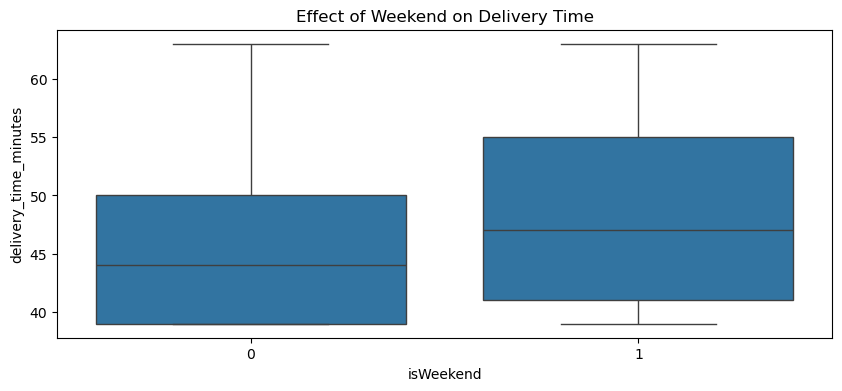

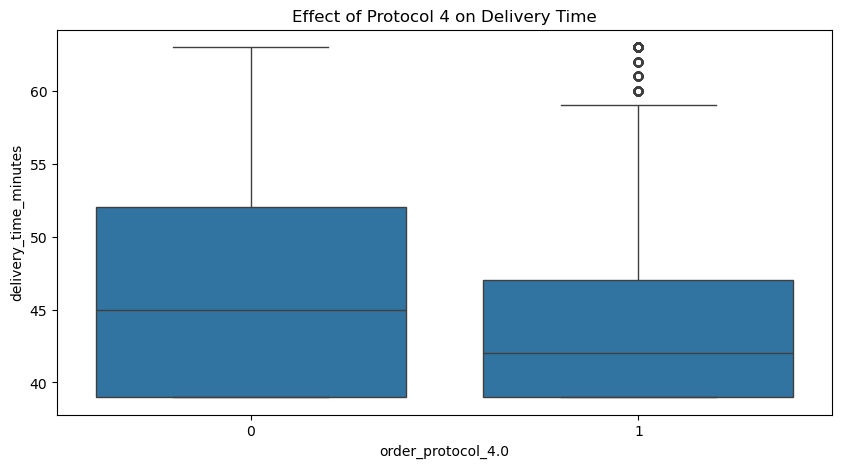

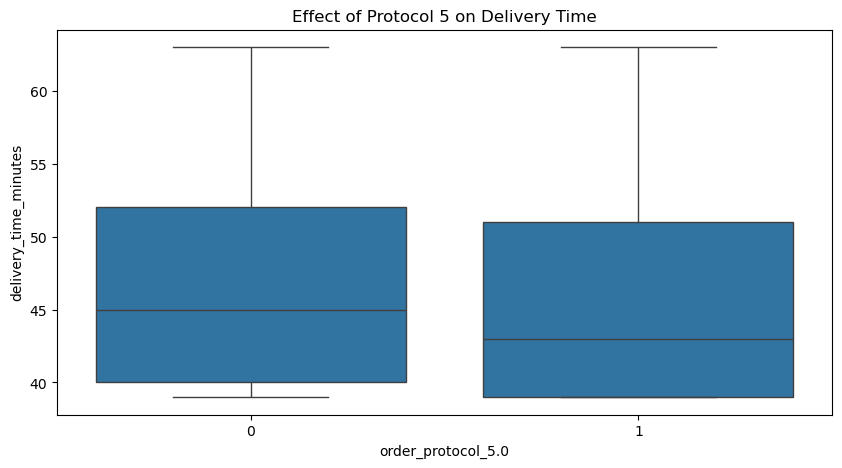

In [58]:

plt.figure(figsize=(10, 4))
sns.boxplot(x='isWeekend', y='delivery_time_minutes', data=X_train.join(y_train))
plt.title("Effect of Weekend on Delivery Time")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='order_protocol_4.0', y='delivery_time_minutes', data=X_train_encoded.join(y_train))
plt.title("Effect of Protocol 4 on Delivery Time")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='order_protocol_5.0', y='delivery_time_minutes', data=X_train_encoded.join(y_train))
plt.title("Effect of Protocol 5 on Delivery Time")
plt.show()


isWeekend:
Positive coefficient (+3.72 min in original scale).
Weekends have longer average delivery times, likely due to higher demand or reduced staffing levels.

order_protocol:
Both Protocol 4 and Protocol 5 reduce delivery time compared to the baseline protocol (Protocol 1).

Protocol 4 shows the fastest and most consistent delivery times (lowest median in boxplot).

Protocol 5 also reduces delivery time (~1.9 min on average), but with more variability in outcomes.

Other protocols have mixed or negligible effects after controlling for other variables.




##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>



20% of the dataset is randomly set aside for testing (evaluation of the model).

80% of the dataset is used for training (building the model).





##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

distance has the highest positive correlation with delivery time.

This means longer delivery distances are strongly associated with longer delivery times, more than any other single numerical feature in the dataset.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

We used visual analysis via boxplots for each numerical predictor variable

Observations lying beyond 1.5×IQR (Interquartile Range) or far outside the whiskers were considered potential outliers.

We applied quantile-based capping to handle outliers:

Values below the 25th percentile (Q1) or above the 95th percentile (Q3) were capped to those respective threshold values.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**

distance - Strongest positive effect

subtotal - Larger order values slightly increase time

total_outstanding_orders - More pending orders increase delay



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**

The goal of Linear Regression is to model the relationship between:
Y=Target (dependent variable)
𝑋 = Features (independent variables)

Y = B0+B1X1+B2X2+B3X3+....BnXn

For the algorithm to work optimally, these assumptions are typically made:

Linearity: Relationship between features and target is linear.

Independence: Observations are independent of each other.

Homoscedasticity: Residual errors have constant variance.

Normality: Residuals are normally distributed.

No multicollinearity: Features are not highly correlated with each other.






---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**

Simple Linear Regression:

Predicts the target variable (Y) using only one independent variable (X).
Easy to visualize and interpret.


Multiple Linear Regression

Predicts the target variable (Y) using two or more independent variables (X1, X2, …, Xn).
Visualization is harder, interpretation requires understanding coefficients.





---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**

The cost function quantifies the error between the predicted values and the actual observed values 

The goal of Linear Regression is to find coefficients that minimize this error, resulting in the best-fitting line (or hyperplane).

In Linear Regression, the Mean Squared Error (MSE) cost function is employed, which calculates the average of the squared errors between the predicted values and the actual values 


Minimization is done by gradient desectn 

Gradient descent is an optimization technique used to train a linear regression model by minimizing the prediction error. It works by starting with random model parameters and repeatedly adjusting them to reduce the difference between predicted and actual values.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

Overfitting occurs when a model learns too much detail and noise from the training data, making it perform well on training data but poorly on unseen/test data.

Underfitting occurs when a model is too simple to capture the underlying patterns in the data, leading to poor performance on both training and test data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**

Residuals are the differences between actual observed values and the predicted values from the model:

They represent the unexplained errors left after the model's predictions.

it helps in Detecting Non-Linearity, Detecting Heteroscedasticity (Non-constant Variance), Identifying Outliers or Influential Points,  Checking Normality of Errors